In [ ]:
!kill -9 -1

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/PGPAIML/DecisionTree-W2/'
%cd $path
!pip install import-ipynb
import import_ipynb
import DecisionTreeHelper as dth
dth.print_load()

Mounted at /content/drive
/content/drive/MyDrive/PGPAIML/DecisionTree-W2
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
importing Jupyter notebook from DecisionTreeHelper.ipynb
Decision Tree Helper Module Successfully Loaded


In [2]:
loan = pd.read_csv(path+"Loan_Delinquent_Dataset.csv")
data = loan.copy()

In [ ]:
data.head()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,1,36 months,Female,House,Mortgage,>25,300-500
1,2,0,36 months,Female,House,Rent,20-25,>500
2,3,1,36 months,Female,House,Rent,>25,300-500
3,4,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,1,36 months,Female,House,Rent,>25,300-500


In [ ]:
data.tail()

,ID,isDelinquent,term,gender,purpose,home_ownership,age,FICO
11543,11544,0,60 months,Male,other,Mortgage,>25,300-500
11544,11545,1,36 months,Male,House,Rent,20-25,300-500
11545,11546,0,36 months,Female,Personal,Mortgage,20-25,>500
11546,11547,1,36 months,Female,House,Rent,20-25,300-500
11547,11548,1,36 months,Male,Personal,Mortgage,20-25,300-500


In [ ]:
data.shape

(11548, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11548 entries, 0 to 11547
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              11548 non-null  int64 
 1   isDelinquent    11548 non-null  int64 
 2   term            11548 non-null  object
 3   gender          11548 non-null  object
 4   purpose         11548 non-null  object
 5   home_ownership  11548 non-null  object
 6   age             11548 non-null  object
 7   FICO            11548 non-null  object
dtypes: int64(2), object(6)
memory usage: 721.9+ KB


In [ ]:
data.isnull().sum()

,0
ID,0
isDelinquent,0
term,0
gender,0
purpose,0
home_ownership,0
age,0
FICO,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data["ID"].nunique()

11548

In [3]:
data.drop(["ID"], axis=1, inplace=True)

In [ ]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
isDelinquent,11548.0,NaN,NaN,NaN,0.668601,0.470737,0.0,0.0,1.0,1.0,1.0
term,11548,2,36 months,10589,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11548,2,Male,6555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purpose,11548,7,House,6892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,11548,3,Mortgage,5461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,11548,2,20-25,5888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FICO,11548,2,300-500,6370,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data["purpose"].replace("other", "Other", inplace=True)

In [5]:
X, y = dth.get_X_y(data, 'isDelinquent')

In [ ]:
X

,term,gender,purpose,home_ownership,age,FICO
0,36 months,Female,House,Mortgage,>25,300-500
1,36 months,Female,House,Rent,20-25,>500
2,36 months,Female,House,Rent,>25,300-500
3,36 months,Female,Car,Mortgage,>25,300-500
4,36 months,Female,House,Rent,>25,300-500
...,...,...,...,...,...,...
11543,60 months,Male,other,Mortgage,>25,300-500
11544,36 months,Male,House,Rent,20-25,300-500
11545,36 months,Female,Personal,Mortgage,20-25,>500
11546,36 months,Female,House,Rent,20-25,300-500


In [ ]:
y

,isDelinquent
0,1
1,0
2,1
3,1
4,1
...,...
11543,0
11544,1
11545,0
11546,1


In [6]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,term_60 months,gender_Male,purpose_House,purpose_Medical,purpose_Other,purpose_Personal,purpose_Wedding,home_ownership_Own,home_ownership_Rent,age_>25,FICO_>500
0,False,False,True,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,True,False,True
2,False,False,True,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,True,False,False,False,False,False,True,True,False


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
model0 = DecisionTreeClassifier(criterion="gini", random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
dth.model_performance_details(model0, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.855514,0.9088,0.881563,0.894974


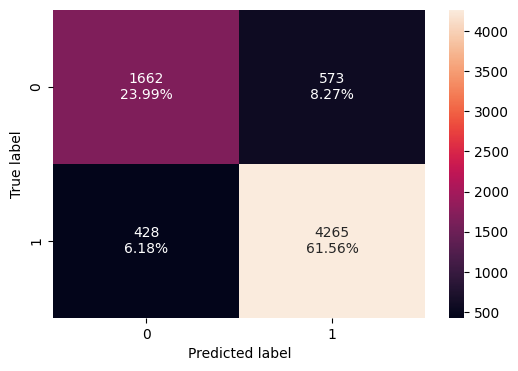

In [ ]:
dth.display_confusion_matrix(model0, X_train, y_train)

In [ ]:
dth.model_performance_details(model0, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.843723,0.897292,0.868606,0.882716


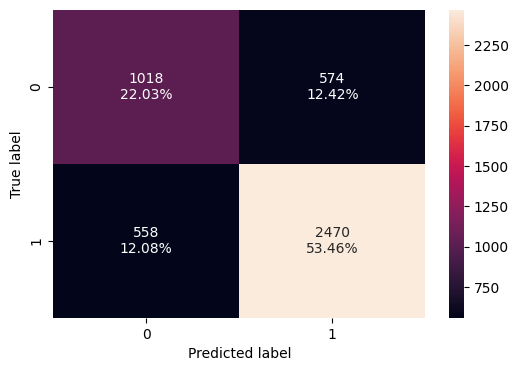

In [ ]:
dth.display_confusion_matrix(model0, X_test, y_test)

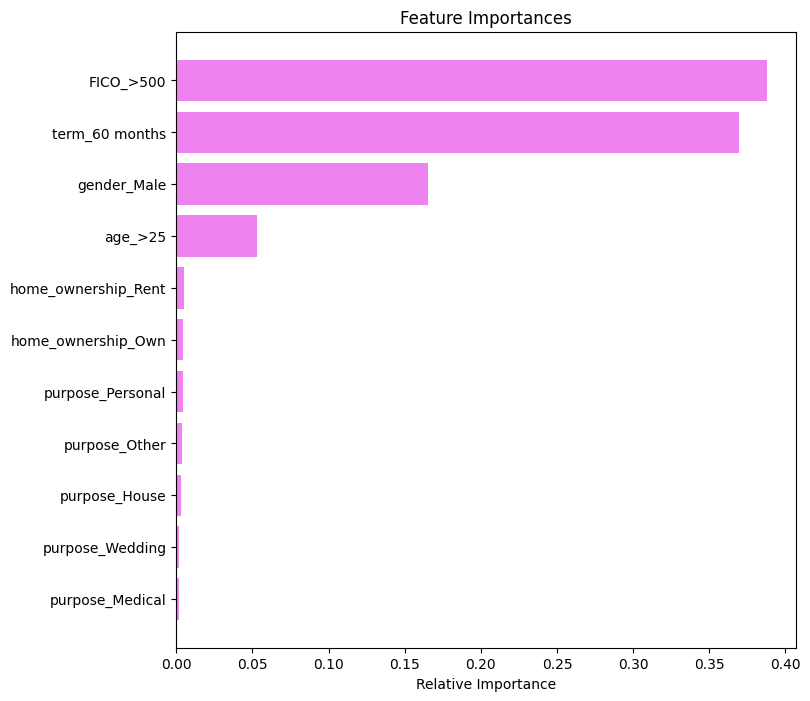

In [ ]:
dth.display_importance_of_features(model0, X.columns)

In [ ]:
max_depth_values = np.arange(2, 7, 2)
max_leaf_nodes_values = [50, 75, 150, 250]
min_samples_split_values = [10, 30, 50, 70]
best_score, best_model = dth.find_best_decision_tree_by_pre_pruning(X_train, y_train, X_test, y_test, max_depth_values, max_leaf_nodes_values, min_samples_split_values)

In [ ]:
dth.model_performance_details(best_model, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.855081,0.9088,0.881016,0.894693


In [ ]:
dth.model_performance_details(best_model, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.844805,0.897622,0.86976,0.883471


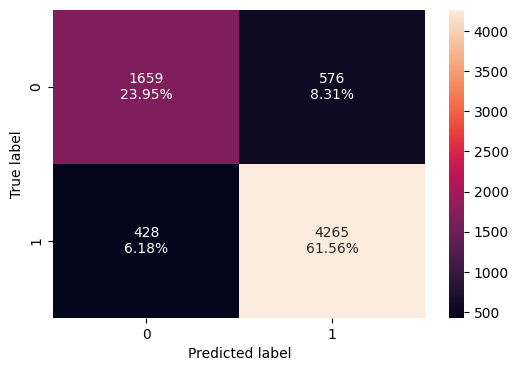

In [ ]:
dth.display_confusion_matrix(best_model, X_train, y_train)

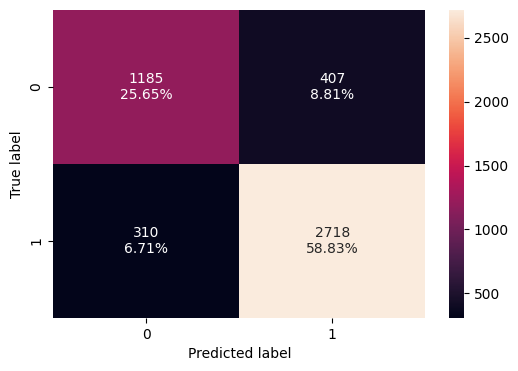

In [ ]:
dth.display_confusion_matrix(best_model, X_test, y_test)

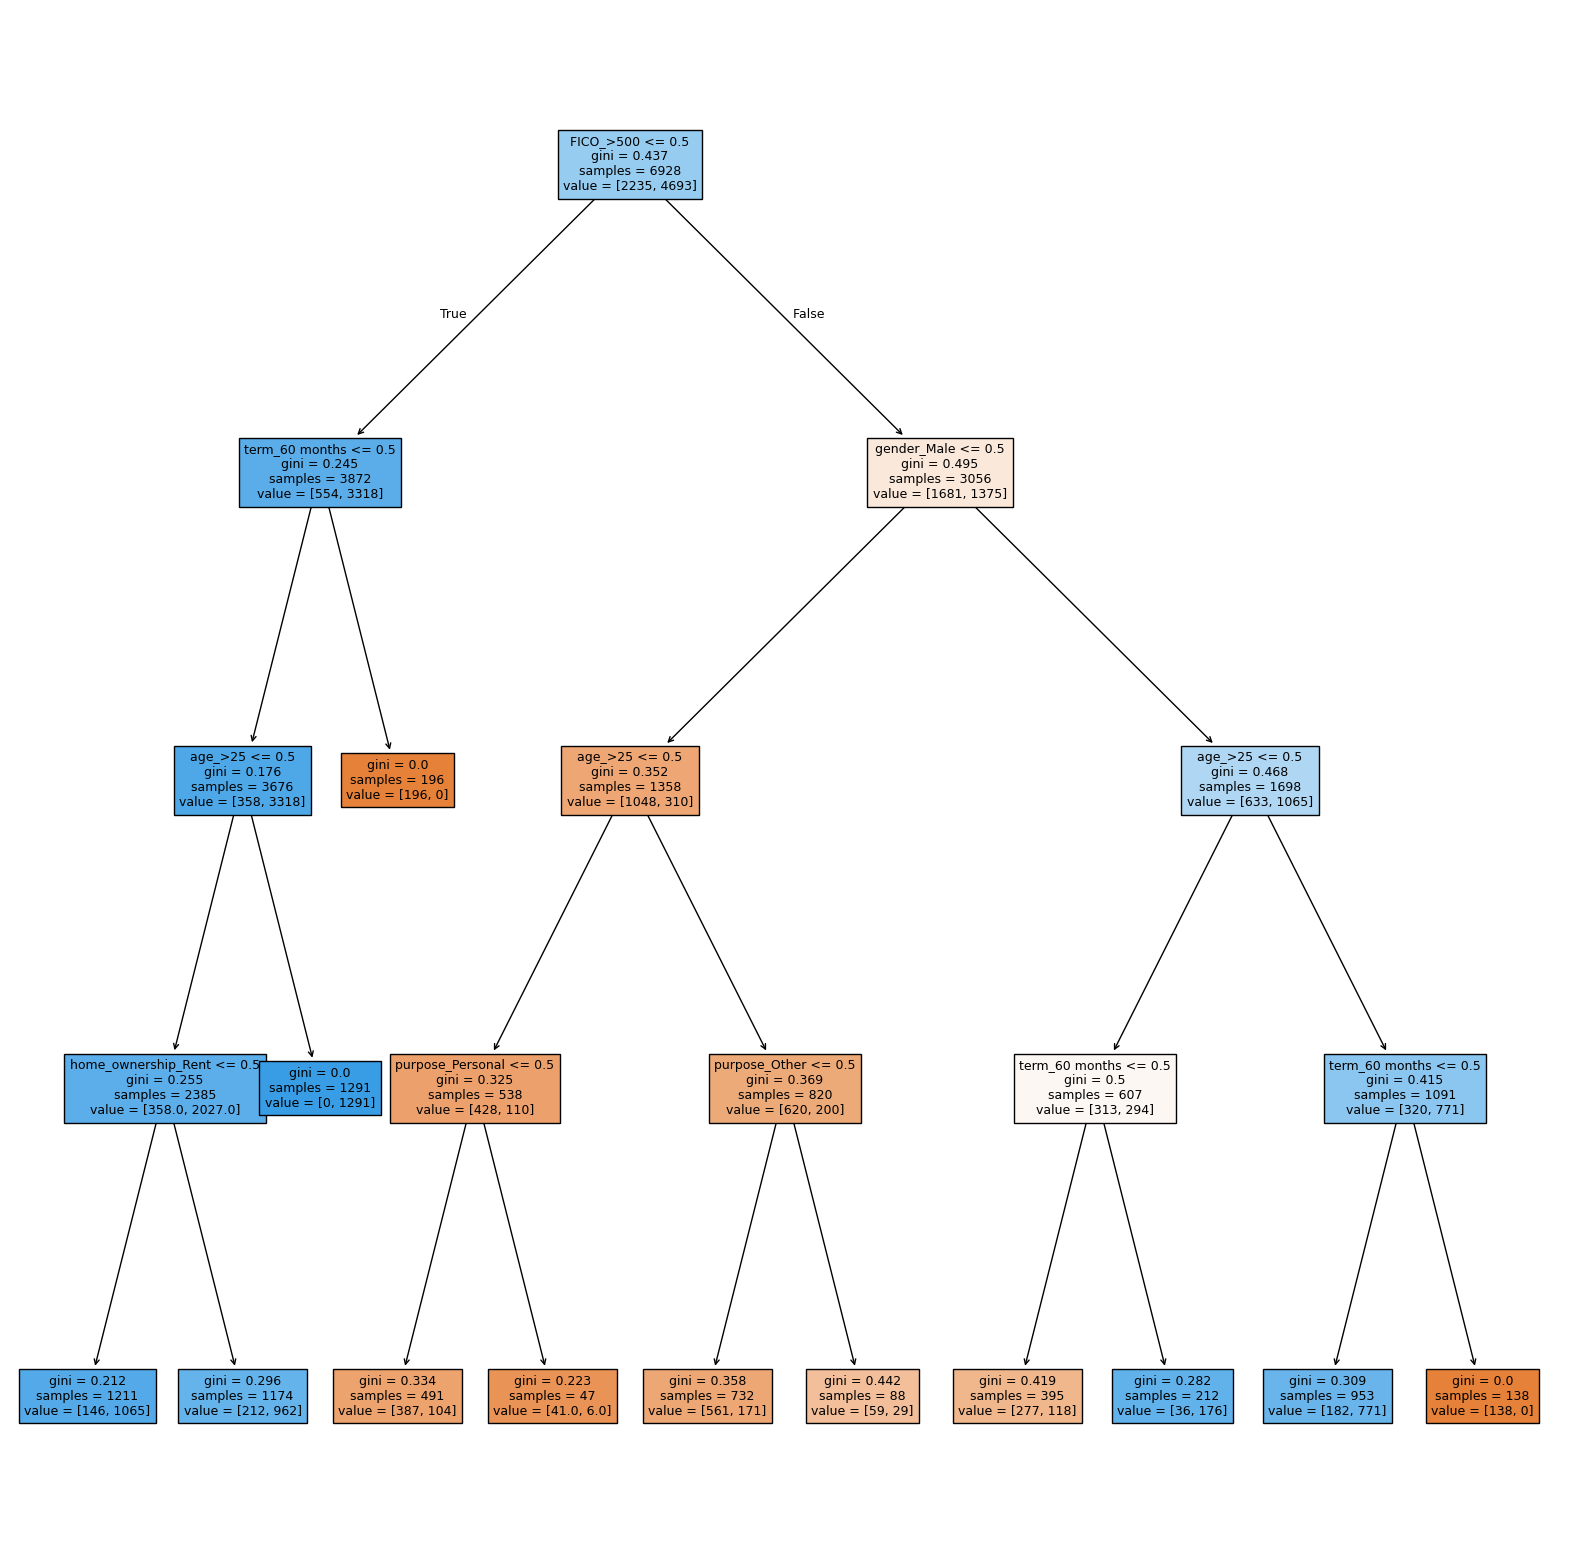

In [ ]:
dth.display_decision_tree(best_model, X.columns)

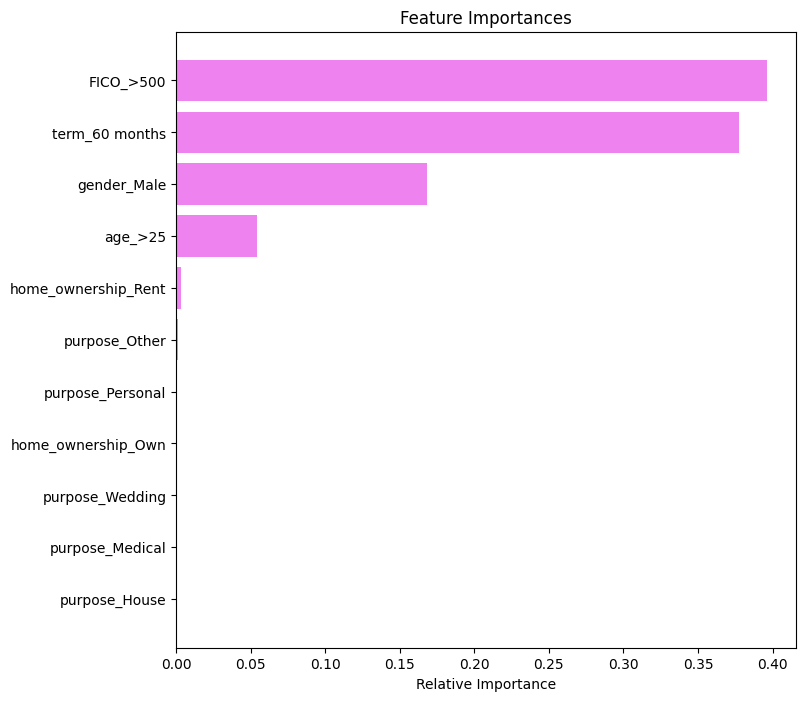

In [ ]:
dth.display_importance_of_features(best_model, X.columns)

      ccp_alphas  impurities
0   0.000000e+00    0.226403
1   0.000000e+00    0.226403
2   2.794668e-09    0.226403
3   2.244984e-07    0.226403
4   4.918264e-07    0.226404
..           ...         ...
80  1.124860e-02    0.248618
81  1.417137e-02    0.276961
82  3.466595e-02    0.311627
83  4.376431e-02    0.355391
84  8.167025e-02    0.437061

[85 rows x 2 columns]


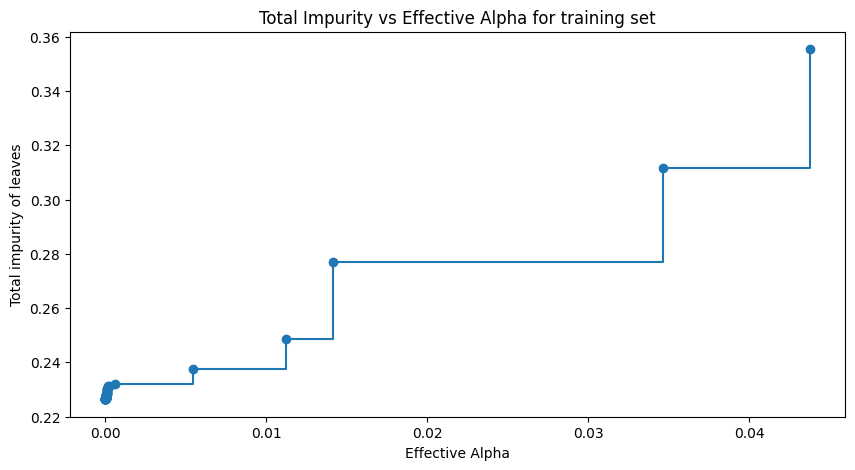

Number of nodes in the last tree is 1 with ccp_alpha 0.08167024657332106


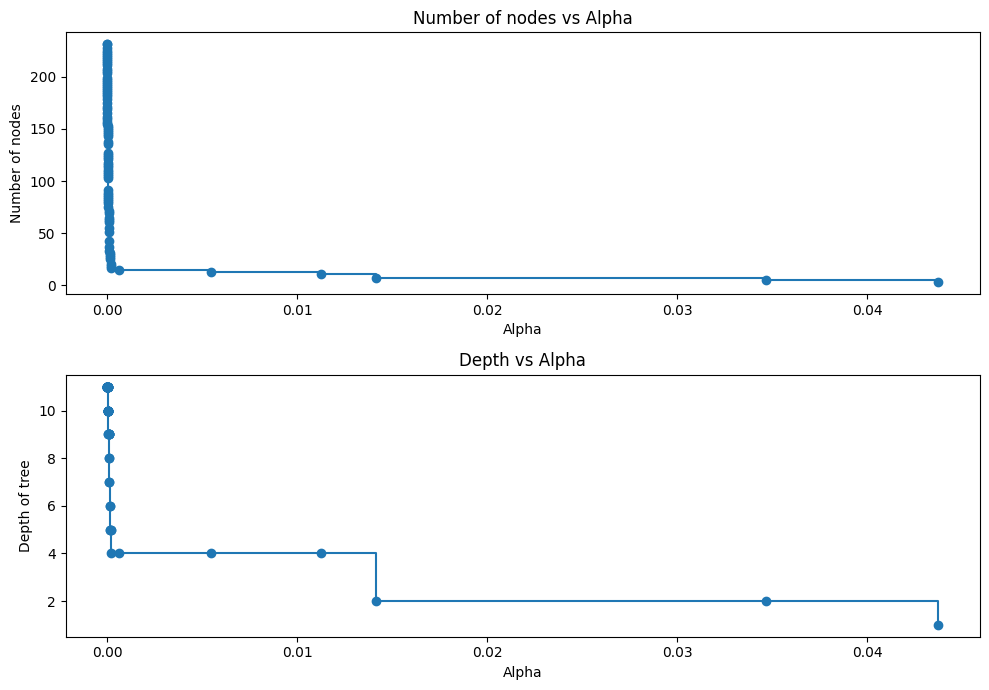

In [8]:
alphas, clfs = dth.display_decision_tree_alpha_plots(X_train, y_train)

In [9]:
train_f1 = dth.generate_f1_scores(clfs, X_train, y_train)

In [10]:
test_f1 = dth.generate_f1_scores(clfs, X_test, y_test)
test_f1

[0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493827161,
 0.8827160493

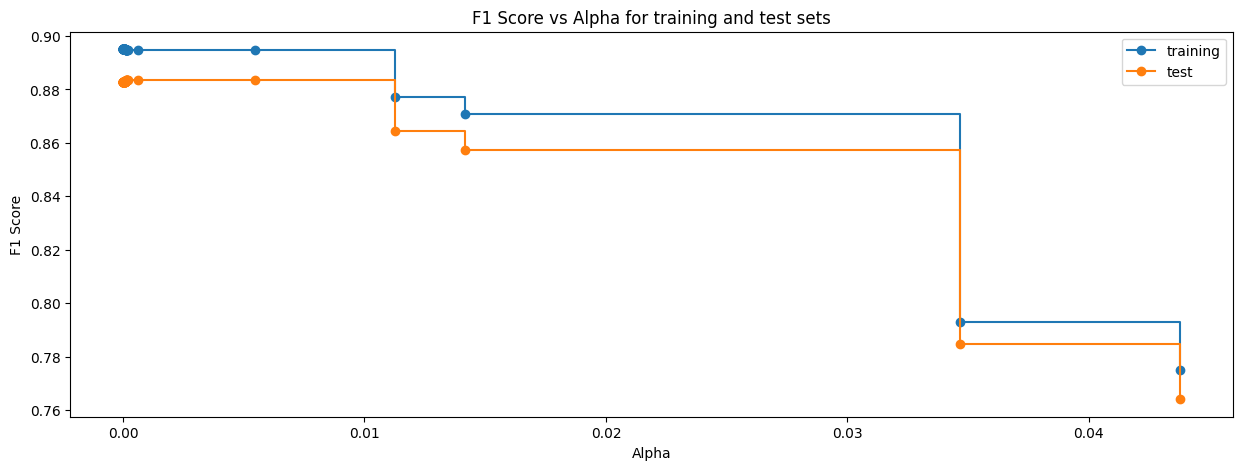

In [11]:
dth.display_f1_comparison(alphas, train_f1, test_f1)

In [12]:
best_model_p = dth.find_best_decision_tree_by_post_pruning(clfs, test_f1)

DecisionTreeClassifier(ccp_alpha=0.00012179184081778801, random_state=42)


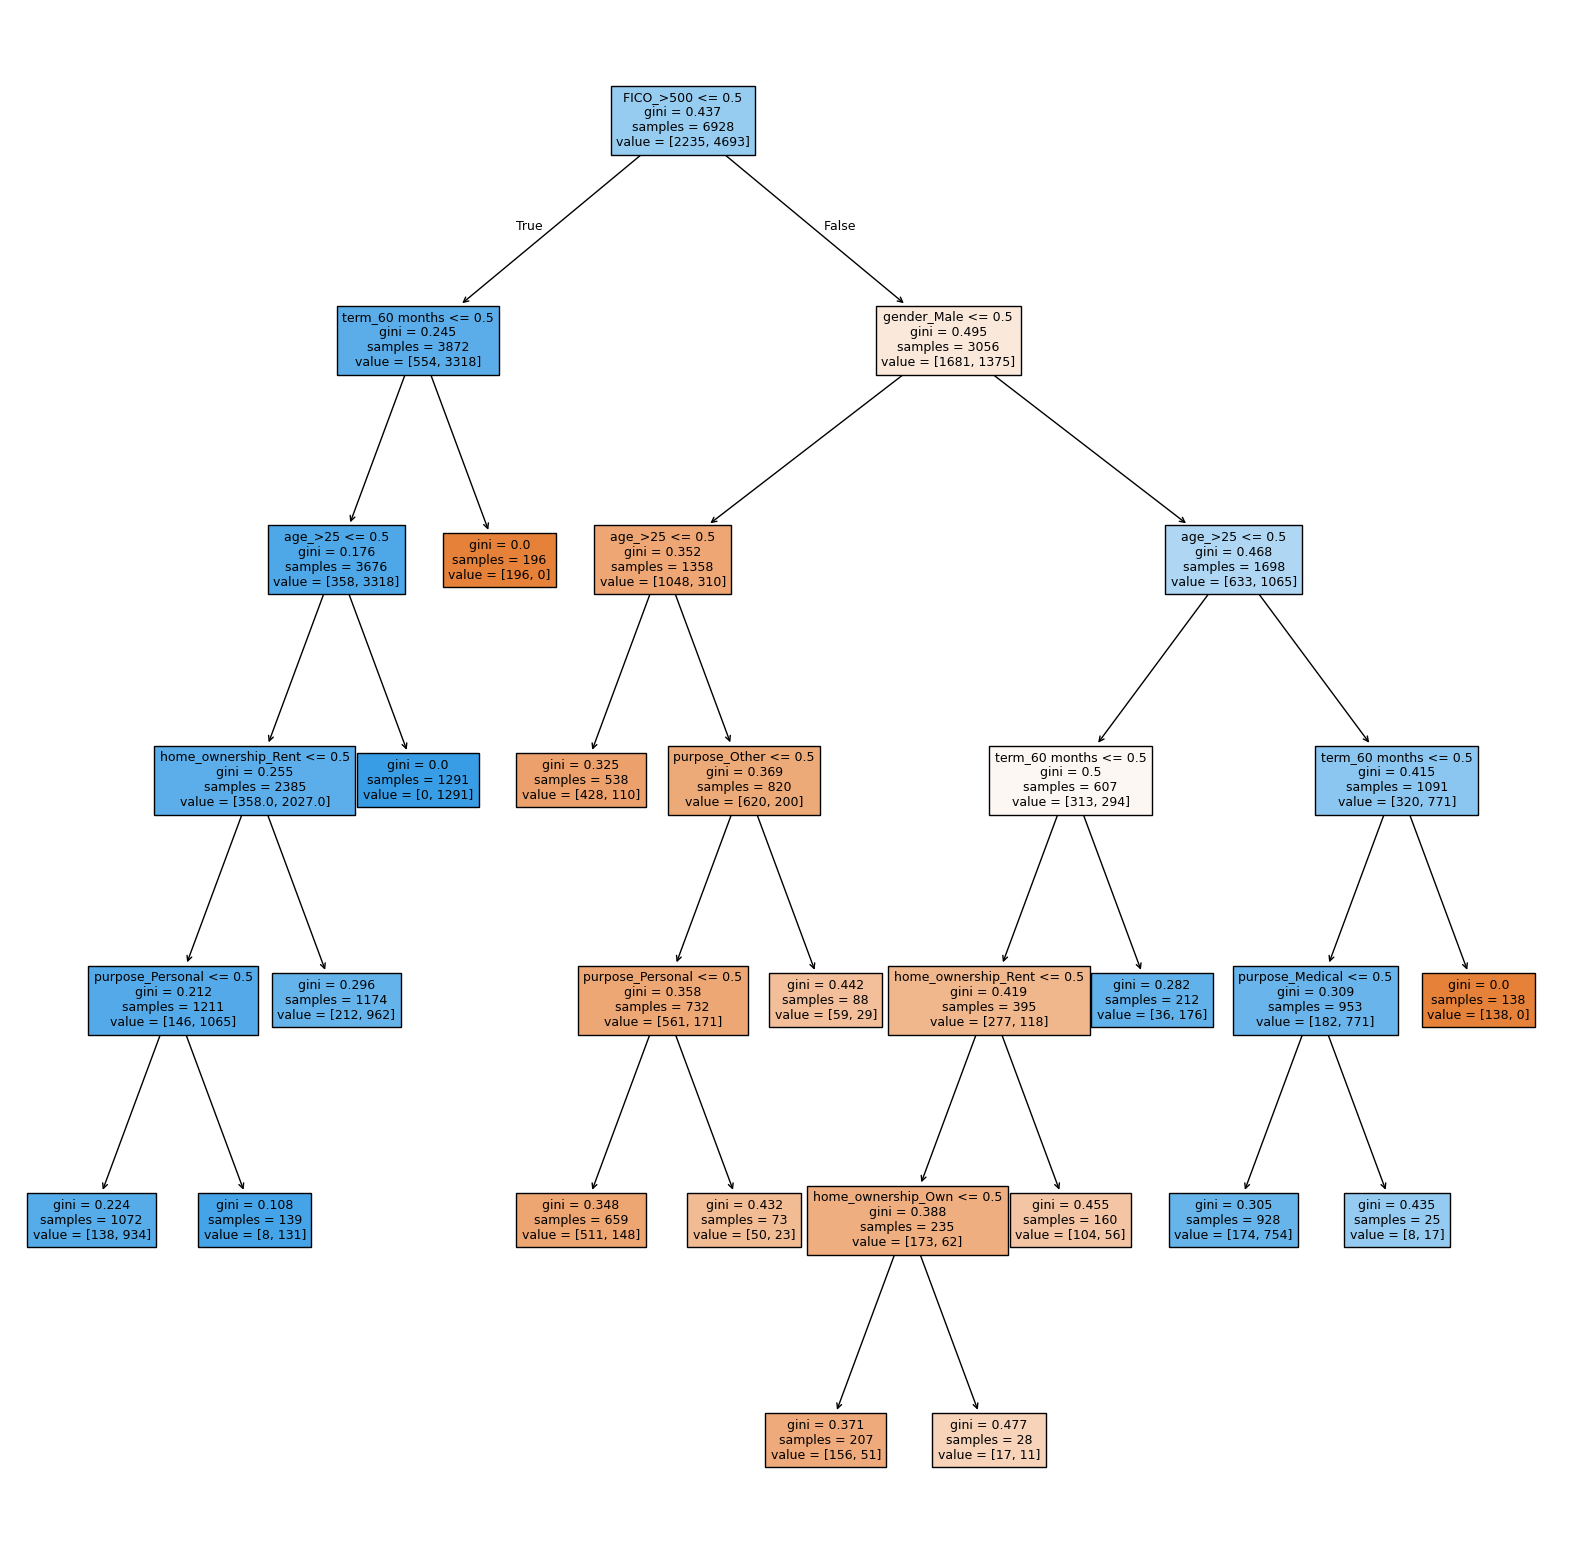

In [13]:
dth.display_decision_tree(best_model_p,X.columns)

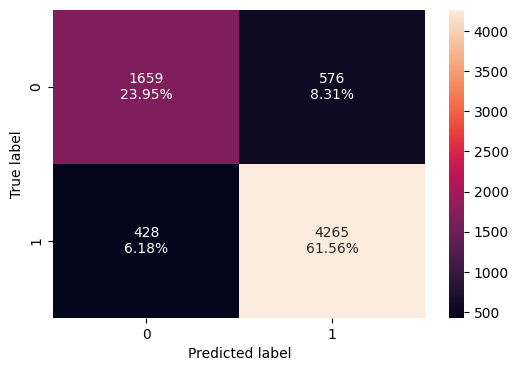

In [14]:
dth.display_confusion_matrix(best_model_p, X_train, y_train)

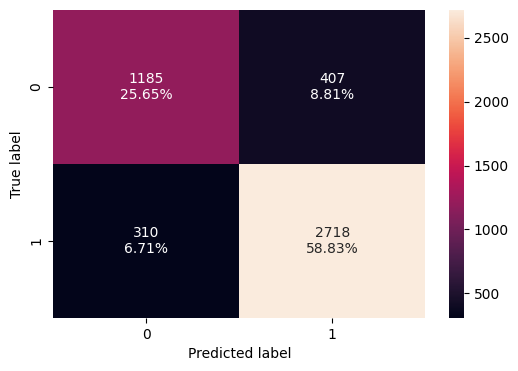

In [ ]:
dth.display_confusion_matrix(best_model_p, X_test, y_test)

In [22]:
# train1_performance=dth.get_model_performance_details(model0, X_train, y_train)
# test1_performance=dth.get_model_performance_details(model0, X_test, y_test)
# train2_performance=dth.get_model_performance_details(best_model, X_train, y_train)
# test2_performance=dth.get_model_performance_details(best_model, X_test, y_test)
train3_performance=dth.get_model_performance_details(best_model_p, X_train, y_train)
test3_performance=dth.get_model_performance_details(best_model_p, X_test, y_test)
# dth.print_decision_tree_comparison_metrics(train1_performance, test1_performance, 'Original')



NameError: name 'train1_performance' is not defined

In [17]:
dth.list_decision_tree_comparison_metrics(train2_performance, test2_performance, 'Pre-pruning')

AttributeError: module 'DecisionTreeHelper' has no attribute 'list_decision_tree_comparison_metrics'

In [23]:
dth.print_decision_tree_comparison_metrics(train3_performance, test3_performance, 'Post-pruning')

Performance comparison of: Post-pruning
            (Train)    (Test)    (Diff)
Accuracy   0.855081  0.844805  0.010276
Recall     0.908800  0.897622  0.011178
Precision  0.881016  0.869760  0.011256
F1         0.894693  0.883471  0.011221


In [31]:
%%time
dth.print_prediction_details(best_model_p, X_test.iloc[57:58, :])

Prediction: [0]
Likelyhood/Confidence: 0.39285714285714285
CPU times: user 8.34 ms, sys: 0 ns, total: 8.34 ms
Wall time: 10 ms
